Despite the previous example, this time the dataset doesn't exist in "keras.datasets" but we know the download link for the dataset. Here is how we can download a dataset by using its download link:

We have a zip file and need to unzip it. The command "!unzip  file_path" helps to 

In [1]:
!unzip /content/drive/MyDrive/dataset.zip

Archive:  /content/drive/MyDrive/dataset.zip
   creating: dataset/
   creating: dataset/blue/
  inflating: dataset/blue/1.jpg      
  inflating: dataset/blue/10.jpg     
  inflating: dataset/blue/100.jpg    
  inflating: dataset/blue/101.jpg    
  inflating: dataset/blue/102.jpg    
  inflating: dataset/blue/103.jpg    
  inflating: dataset/blue/104.jpg    
  inflating: dataset/blue/105.jpg    
  inflating: dataset/blue/106.jpg    
  inflating: dataset/blue/107.jpg    
  inflating: dataset/blue/108.jpg    
  inflating: dataset/blue/109.jpg    
  inflating: dataset/blue/11.jpg     
  inflating: dataset/blue/110.jpg    
  inflating: dataset/blue/111.jpg    
  inflating: dataset/blue/112.jpg    
  inflating: dataset/blue/113.jpg    
  inflating: dataset/blue/114.jpg    
  inflating: dataset/blue/115.jpg    
  inflating: dataset/blue/116.jpg    
  inflating: dataset/blue/117.jpg    
  inflating: dataset/blue/118.jpg    
  inflating: dataset/blue/119.jpg    
  inflating: dataset/blue/12.jpg

In [2]:
import os 

os.makedirs('/content/Dataset/', exist_ok = True)

os.makedirs('/content/Dataset/Train/', exist_ok = True)
os.makedirs('/content/Dataset/Train/blue/', exist_ok = True)
os.makedirs('/content/Dataset/Train/white/', exist_ok = True)
os.makedirs('/content/Dataset/Train/noise/', exist_ok = True)

os.makedirs('/content/Dataset/Validation/', exist_ok = True)
os.makedirs('/content/Dataset/Validation/blue/', exist_ok = True)
os.makedirs('/content/Dataset/Validation/white/', exist_ok = True)
os.makedirs('/content/Dataset/Validation/noise/', exist_ok = True)

We can see the names of files or folders which exist in a specific directory by using the "os.listdir(path_to_directory)" command. This command will return a Python list which each element of it is a name of a file or folder in that directory.

In [3]:
blue_names = os.listdir('/content/dataset/blue/')
white_names = os.listdir('/content/dataset/white/')
noise_names = os.listdir('/content/dataset/noise/')

Let's use the "pillow" library from Python to read some of these images and visualize them with "matplotlib". If you don't have "pillow" installed, you can install it with pip:

In [4]:
!pip install pillow

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's split the data into train and validation set by moving 80\% of the images into **Dataset/Train** folder and 20\% of the data into **Dataset/Validation**. The *s*shutil** library from Python help here. The command **"shutil.copy(source_file_path, target_file_path)"** will copy the file with the address **source_file_path** into **target_file_path** folder. 

In [6]:
import shutil 

split_rate = 0.8

for i in range(len(blue_names)):
    if i <= 0.8 * len(blue_names):
        shutil.copy('/content/dataset/blue/' + blue_names[i],
                    '/content/Dataset/Train/blue/' + blue_names[i])
    else:
        shutil.copy('/content/dataset/blue/' + blue_names[i],
                    '/content/Dataset/Validation/blue/' + blue_names[i])


for i in range(len(white_names)):
    if i <= 0.8 * len(white_names):
        shutil.copy('/content/dataset/white/' + white_names[i],
                    '/content/Dataset/Train/white/' + white_names[i])
    else:
        shutil.copy('/content/dataset/white/' + white_names[i],
                    '/content/Dataset/Validation/white/' + white_names[i])
        
for i in range(len(noise_names)):
    if i <= 0.8 * len(noise_names):
        shutil.copy('/content/dataset/noise/' + noise_names[i],
                    '/content/Dataset/Train/noise/' + noise_names[i])
    else:
        shutil.copy('/content/dataset/noise/' + noise_names[i],
                    '/content/Dataset/Validation/noise/' + noise_names[i])


**ImageDataGenerator** is a class from tensorflow which can read the images from the directory and load a specific number of images (batch size) in each training step. 

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
target_size = (32, 32)

train_datagen = ImageDataGenerator(rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
        '/content/Dataset/Train/',  
        target_size=target_size,  
        batch_size=batch_size,
        class_mode='categorical')  

validation_generator = test_datagen.flow_from_directory(
        '/content/Dataset/Validation',
        target_size=target_size,
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical')

Found 1918 images belonging to 3 classes.
Found 478 images belonging to 3 classes.


Defining and compiling the model can be done just like before:

In [8]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [30]:
inp_layer = Input(shape = (32, 32, 3))
conv1 = Conv2D(filters = 6, kernel_size=(5, 5), strides = (1, 1), padding = 'valid')(inp_layer)
maxp1 = MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(conv1)
conv2 = Conv2D(filters = 16, kernel_size=(5, 5), strides = (1, 1), padding = 'valid')(maxp1)
maxp2 = MaxPooling2D(pool_size=(2, 2), strides = (2, 2))(conv2)
flat  = Flatten()(maxp2)
FC1   = Dense(units = 50, activation = 'relu')(flat)
FC2   = Dense(units = 50 , activation = 'relu')(FC1)
output = Dense(units = 3, activation = 'softmax')(FC2)

LeNet = Model(inputs = inp_layer, outputs = output)
LeNet.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2005

In [31]:
opt = Adam(0.001)
loss = categorical_crossentropy
LeNet.compile(optimizer=opt, loss = loss, metrics = 'acc')

The only difference is that instead of using the **x_train, y_train** we use the **train generator** and instead of **(x_test, y_test)** we use **validation generator**:

In [32]:
results = LeNet.fit(train_generator,
                    epochs = 15,
                    validation_data=validation_generator)

Epoch 1/15
120/120 [==============================] - 4s 30ms/step - loss: 4.0636 - acc: 0.7044 - val_loss: 0.8465 - val_acc: 0.8577
Epoch 2/15
120/120 [==============================] - 3s 29ms/step - loss: 0.8673 - acc: 0.8285 - val_loss: 0.4378 - val_acc: 0.8828
Epoch 3/15
120/120 [==============================] - 3s 29ms/step - loss: 0.5716 - acc: 0.8571 - val_loss: 0.3724 - val_acc: 0.9121
Epoch 4/15
120/120 [==============================] - 3s 28ms/step - loss: 0.3960 - acc: 0.8916 - val_loss: 0.2418 - val_acc: 0.9100
Epoch 5/15
120/120 [==============================] - 3s 29ms/step - loss: 0.3657 - acc: 0.8957 - val_loss: 0.7826 - val_acc: 0.7803
Epoch 6/15
120/120 [==============================] - 4s 30ms/step - loss: 0.3422 - acc: 0.9072 - val_loss: 0.1677 - val_acc: 0.9435
Epoch 7/15
120/120 [==============================] - 3s 29ms/step - loss: 0.2765 - acc: 0.9254 - val_loss: 0.2450 - val_acc: 0.9142
Epoch 8/15
120/120 [==============================] - 4s 29ms/step - 

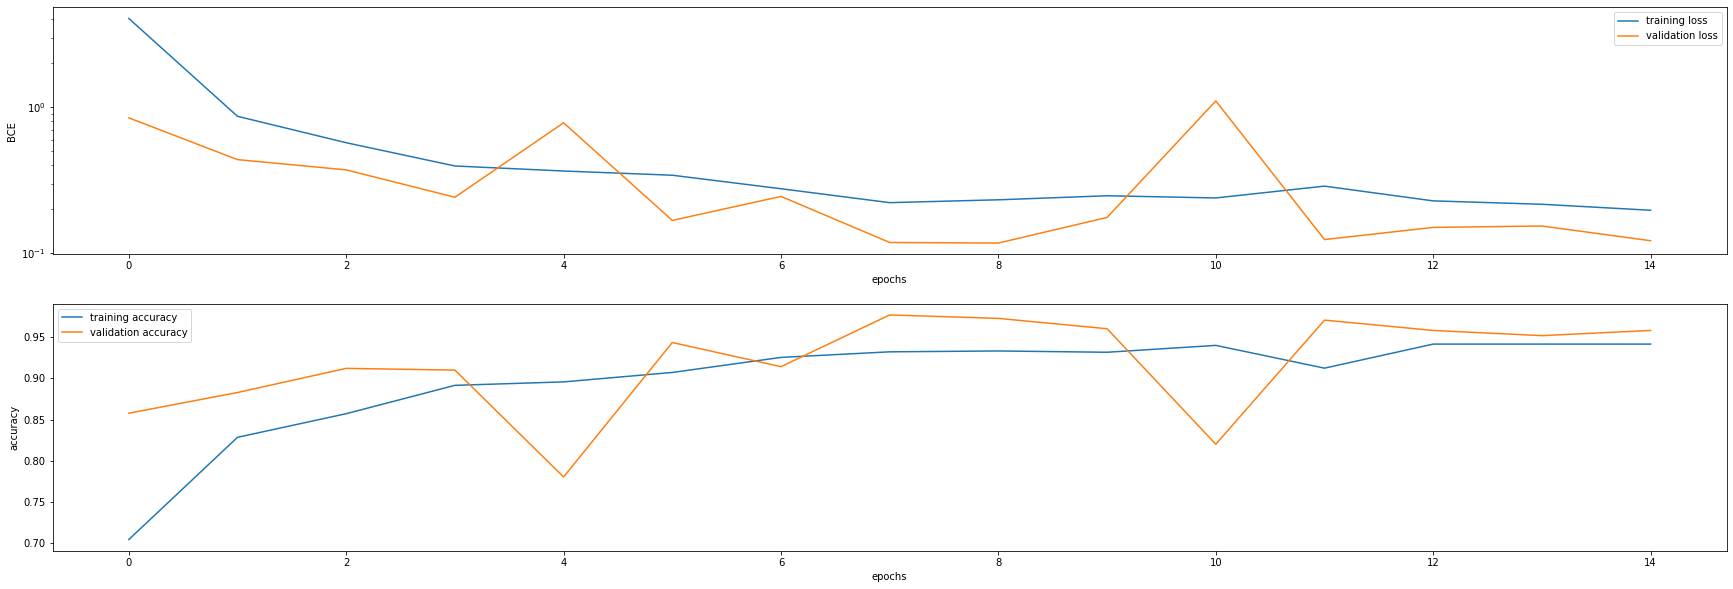

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 

train_loss = results.history['loss']
val_loss = results.history['val_loss']
train_acc = results.history['acc']
val_acc = results.history['val_acc']

plt.subplots(figsize=(30, 10))

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('BCE')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

In [34]:
LeNet.save("model.h5")

In [35]:
from sklearn.metrics import classification_report

In [39]:
y_pred_valid = LeNet.predict(validation_generator)

In [40]:
thresh = 0.5
y_pred_valid[y_pred_valid >= thresh] = 1
y_pred_valid[y_pred_valid < thresh]  = 0

In [41]:
import math
number_of_examples = len(validation_generator.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 16)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(validation_generator[i][1]))

cls_report = classification_report(test_labels, y_pred_valid)

print(cls_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       175
           1       0.97      0.94      0.96       142
           2       0.95      0.97      0.96       161

   micro avg       0.96      0.96      0.96       478
   macro avg       0.96      0.96      0.96       478
weighted avg       0.96      0.96      0.96       478
 samples avg       0.96      0.96      0.96       478



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


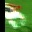

[[1.6548982e-01 7.1284903e-04 8.3379734e-01]]
2


In [42]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/Dataset/Train/white/12.jpg')
cv2_imshow(img)
img = np.expand_dims(img,axis=0)
y_pred_valid = LeNet.predict(img)
print(y_pred_valid)
print(np.argmax(y_pred_valid))

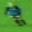

[[0.8999017  0.0041775  0.09592088]]
0


In [47]:
img = cv2.imread('/content/Dataset/Validation/blue/132.jpg')
cv2_imshow(img)
img = np.expand_dims(img,axis=0)
y_pred_valid = LeNet.predict(img)
print(y_pred_valid)
print(np.argmax(y_pred_valid))

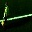

[[0.4459387  0.49112704 0.06293432]]
1


In [46]:
img = cv2.imread('/content/Dataset/Validation/noise/134.jpg')
cv2_imshow(img)
img = np.expand_dims(img,axis=0)
y_pred_valid = LeNet.predict(img)
print(y_pred_valid)
print(np.argmax(y_pred_valid))

In [79]:
import cv2
import numpy as np
from keras.models import load_model
import time

# Create tracker object
tracker = EuclideanDistTracker()


cap = cv2.VideoCapture("/content/drive/MyDrive/output.mp4")
img = cv2.imread("/content/drive/MyDrive/2D_field.png")


#subtractor = cv2.createBackgroundSubtractorKNN(detectShadows=False)
subtractor = cv2.createBackgroundSubtractorMOG2()

######################################################################################################################

p1 = (872,780)
p2 = (640,110)
p3 = (1140,117)
p4 = (139,168)
p5 = (139,168)

points1 = np.array([p1,p2,p3,p4], dtype=np.float32)

p1 = (525,700)
p2 = (525,0)
p3 = (886,143)
p4 = (164,143)
p5 = (164,143)

points2 = np.array([p1,p2,p3,p4], dtype=np.float32)

H, mask = cv2.findHomography(points1, points2, cv2.RANSAC,5.0)

############################################################################################################################
targe_size = 32

tic = time.time()

frames = []
backsub = []
final_images = []

while True:
    img = cv2.imread("/content/drive/MyDrive/2D_field.png")
    ret, frame = cap.read()
    if ret == False:
        break
    #frame = cv2.GaussianBlur(frame,(3,3),1)
    mask = subtractor.apply(frame)
    _, mask = cv2.threshold(mask, 254, 255, cv2.THRESH_BINARY)
    kernel = np.ones((8,1),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    name = 0
    detections = []
    playerCordinates = []
    images = np.zeros(shape=(1,32,32,3))
    for cnt in contours:
        
        # Calculate area and remove small elements
        area = cv2.contourArea(cnt)
        if area > 100:
            #cv2.drawContours(roi, [cnt], -1, (0, 255, 0), 2)
            x, y, w, h = cv2.boundingRect(cnt)
            
            if y < 100:
                continue
            
            detections.append([x, y, w, h])
            
            #playerCordinate = cv2.perspectiveTransform(H,pts).reshape(1,2)
            
            
            point = [[x+w/2],
                     [y+h],
                     [1]]
            
            playerCordinate = np.matmul(H, point)
            
            playerCordinate = playerCordinate/playerCordinate[2]
            
            # img = cv2.circle(img,(int(playerCordinate[0]), int(playerCordinate[1])),5,(0, 0, 255),thickness=5)
            
            
            playerCordinates.append(playerCordinate)
            
            
            dest_points = np.array([(0,0),(targe_size,0),(targe_size,targe_size),(0,targe_size)], dtype=np.float32)
            thickness = 1
            sourc_points = np.array([(x,y), (x + w,y), (x+w,y+h), (x,y+h)], dtype=np.float32)
            H1 = cv2.getPerspectiveTransform(sourc_points, dest_points)
            pic = cv2.warpPerspective(frame,H1,  (targe_size, targe_size))
            pic = np.expand_dims(pic,axis=0)
            images = np.concatenate((images,pic),axis=0)
            # cv2.imshow("11",images[name])          
            name += 1
            
            # y_pred = model.predict(np.expand_dims(pic,axis=0))
            
            # cv2.rectangle(frame, (x, y), (x + w, y + h), (0,255,0), 1)
            
            # if np.argmax(y_pred) == 1:
            #     img = cv2.circle(img,(int(playerCordinate[0]), int(playerCordinate[1])),5,(0, 0, 255),thickness=5)
            # elif np.argmax(y_pred) == 2:
            #     img = cv2.circle(img,(int(playerCordinate[0]), int(playerCordinates[1])),5,(255, 0, 0),thickness=5)
            
    # classify with CNN
    if (images.shape[0] != 0):
        y_pred = LeNet.predict(images)
    for i in range(len(playerCordinates)):
        if np.argmax(y_pred[i]) == 1:
            img = cv2.circle(img,(int(playerCordinates[i][0]), int(playerCordinates[i][1])),5,(255, 0, 0),thickness=5)
        elif np.argmax(y_pred[i]) == 2:
            img = cv2.circle(img,(int(playerCordinates[i][0]), int(playerCordinates[i][1])),5,(0, 0, 255),thickness=5)
    
    
    ##### tracker part
    boxes_ids = tracker.update(detections)
    for box_id in boxes_ids:
        x, y, w, h, id = box_id
        cv2.putText(frame, str(id), (x, y - 15), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2)
        point = [[x+w/2],
                     [y+h],
                     [1]]
        playerCord= np.matmul(H, point)
        playerCord = playerCord/playerCord[2]
        cv2.putText(img, str(id), (int(playerCord[0]), int(playerCord[1])), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2)
    
    frames.append(frame)
    backsub.append(mask)
    final_images.append(img)


    
    key = cv2.waitKey(33)
    if key == 27:
        break

toc = time.time()

time_ratio = (toc-tic)/(720)

print("fps = " + str(1/time_ratio))
cap.release()
cv2.destroyAllWindows()


fps = 7.2164536638337635


In [50]:
import math


class EuclideanDistTracker:
    def __init__(self):
        # Store the center positions of the objects
        self.center_points = {}
        # Keep the count of the IDs
        # each time a new object id detected, the count will increase by one
        self.id_count = 0


    def update(self, objects_rect):
        # Objects boxes and ids
        objects_bbs_ids = []

        # Get center point of new object
        for rect in objects_rect:
            x, y, w, h = rect
            cx = (x + x + w) // 2
            cy = (y + y + h) // 2

            # Find out if that object was detected already
            same_object_detected = False
            for id, pt in self.center_points.items():
                dist = math.hypot(cx - pt[0], cy - pt[1])

                if dist < 25:
                    self.center_points[id] = (cx, cy)
                    #print(self.center_points)
                    objects_bbs_ids.append([x, y, w, h, id])
                    same_object_detected = True
                    break

            # New object is detected we assign the ID to that object
            if same_object_detected is False:
                self.center_points[self.id_count] = (cx, cy)
                objects_bbs_ids.append([x, y, w, h, self.id_count])
                self.id_count += 1

        # Clean the dictionary by center points to remove IDS not used anymore
        new_center_points = {}
        for obj_bb_id in objects_bbs_ids:
            _, _, _, _, object_id = obj_bb_id
            center = self.center_points[object_id]
            new_center_points[object_id] = center

        # Update dictionary with IDs not used removed
        self.center_points = new_center_points.copy()
        return objects_bbs_ids


In [71]:
out = cv2.VideoWriter('/content/drive/MyDrive/backsub.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, (800, 600))

for i in range(len(backsub)):
    out.write(backsub[i])
out.release()

In [56]:
out = cv2.VideoWriter('/content/drive/MyDrive/final_images.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, (800, 600))

for i in range(len(final_images)):
    out.write(final_images[i])
out.release()

In [62]:
frames[0].shape

(960, 1280, 3)

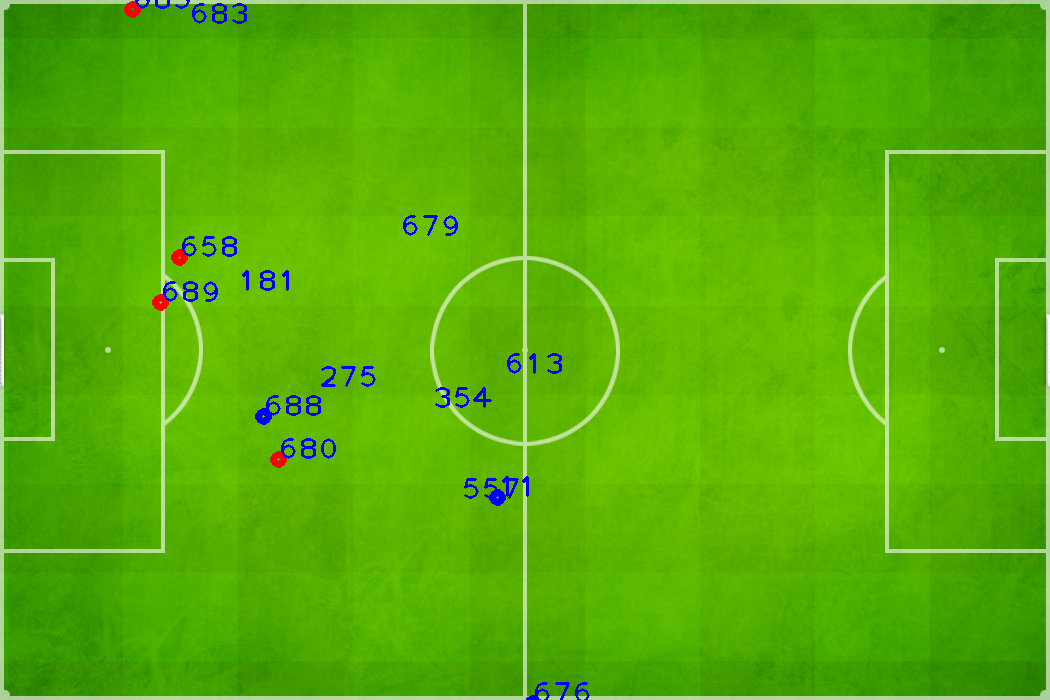

In [69]:
cv2_imshow(final_images[700])